# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Ayush Kamleshbhai Patel
#### Student ID: s3891013

Date: XXXX

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used: please include the main libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy

## Introduction
Brief information of this assessment, e.g., what problems were this assessment tackling, what problems were discovered in the data while you were parsing or cleansing it, and the approaches you chose to handle them, etc.

<span style="color: red"> Note that this is a sample notebook only. You will need to fill in the proper markdown and code blocks. You might also want to make necessary changes to the structure to meet your own needs. Note also that any generic comments written in this notebook are to be removed and replace with your own words.</span>

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import re
import seaborn as sns
import matplotlib.pyplot as plt
import difflib
# import sklearn

## Task 1. Parsing Data

### 1.1. Examining and loading data


Examine "s3891013_dataset1.xml" to determine its content and structure, then load it into Python. Explain your findings here, e.g., how are the records are stored? 

In [2]:
# Code to inspect the provided data file
tree = ET.parse('s3891013_dataset1.xml')
root = tree.getroot()
# Couple of notes for all code block in this notebook
## please provide proper comment on your code
## Please re-start and run all cells to make sure codes are runable and include your output in the submission

In [3]:
num_sources = len(root.findall('Source'))
num_rows_first_source = len(root.find('Source').findall('Row'))
print(f"Number of Sources: {num_sources}")
print(f"Number of Records in First Source: {num_rows_first_source}")

Number of Sources: 107
Number of Records in First Source: 174


In [4]:
first_record = root.find('Source').find('Row')
for child in first_record:
    print(child.tag, ":", child.text)

Title : PI Underwriter  Regional Markets
Location : London
Company : Idex Consulting LLP
ContractTime : permanent
Category : Accounting & Finance Jobs
Salary : 57500
OpenDate : 20121214T000000
CloseDate : 20130212T000000


## Content and Structure of the XML file:

### Root Element:
The root element of the XML document is `<Instances>`.

### Sources:
Inside the root element, there are child elements named `<Source>`. Each of these elements represents a source of data and has an attribute `Name` which provides the name of the source. The document contains data from 107 different sources.

### Records/Rows:
Within each `<Source>` element, there are multiple `<Row>` elements. These rows represent individual job listings. Each `<Row>` element has an attribute `ID`, which is a unique identifier for that record.

### Data Fields:
Inside each `<Row>`, there are several child elements that provide details about the job listing:

- `<Title>`: Represents the title or position of the job.
- `<Location>`: Denotes where the job is located.
- `<Company>`: The company or organization offering the job.
- `<ContractTime>`: Specifies the type of job contract (e.g., permanent).
- `<Category>`: The category or domain of the job (e.g., Accounting & Finance Jobs).
- `<Salary>`: The offered salary for the job position.
- `<OpenDate>`: The start date for accepting job applications.
- `<CloseDate>`: The last date for accepting job applications.

This structure suggests that the XML file aggregates job listings from various sources. Each source can have multiple job listings, and each job listing provides detailed information about the position.


### 1.2 Parsing data into the required format

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

In [5]:
# Parsing the XML and storing it in a list of dictionaries
data = []

# Iterating through each source and its rows
for source in root.findall('Source'):
    sourceName = source.attrib['Name']
    for row in source.findall('Row'):
        record = {
            'Id': row.attrib['ID'],
            'Title': row.find('Title').text if row.find('Title') is not None else None,
            'Location': row.find('Location').text if row.find('Location') is not None else None,
            'Company': row.find('Company').text if row.find('Company') is not None else None,
            'ContractType': row.find('ContractType').text if row.find('ContractType') is not None else None,
            'ContractTime': row.find('ContractTime').text if row.find('ContractTime') is not None else None,
            'Category': row.find('Category').text if row.find('Category') is not None else None,
            'Salary': row.find('Salary').text if row.find('Salary') is not None else None,
            'OpenDate': row.find('OpenDate').text if row.find('OpenDate') is not None else None,
            'CloseDate': row.find('CloseDate').text if row.find('CloseDate') is not None else None,
            'SourceName': sourceName
        }
        data.append(record)

df = pd.DataFrame(data)

In [6]:
df.head(10)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,68241654,PI Underwriter Regional Markets,London,Idex Consulting LLP,None,permanent,Accounting & Finance Jobs,57500,20121214T000000,20130212T000000,insurancejobs.co.uk
1,71138818,COMMERCIAL INSURANCE ACCOUNT HANDLER HERTFORD...,London,Clark James Insurance And Financial Services R...,None,permanent,Accounting & Finance Jobs,26000,20130314T150000,20130612T150000,insurancejobs.co.uk
2,71391843,Claims Handler Motor Trade,Hertfordshire,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,19000,20131124T120000,20140222T120000,insurancejobs.co.uk
3,70420154,Commercial Jewellers Block Account Handler,Birmingham,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,22000,20121230T150000,20130129T150000,insurancejobs.co.uk
4,67779524,Protection Indemnity Underwriter,The City,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,45000,20120904T150000,20121103T150000,insurancejobs.co.uk
5,70420179,Underwriting Manager Transportation/fleet,Shropshire,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,45000,20130104T150000,20130404T150000,insurancejobs.co.uk
6,70420168,Insurance Risk Control/Senior Surveyor,London,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,45000,20120329T150000,20120627T150000,insurancejobs.co.uk
7,72218671,Personal Lines Sales Executive,Bracknell,MW Appointments,None,permanent,Accounting & Finance Jobs,19000,20130614T120000,20130714T120000,insurancejobs.co.uk
8,68621337,Commercial Account Executive (Manchester) ***...,Manchester,Idex Consulting LLP,None,permanent,Accounting & Finance Jobs,45000,20130214T000000,20130316T000000,insurancejobs.co.uk
9,67779521,Senior Commercial Business Development Manager,Lancashire,Lawes Insurance Recruitment,None,permanent,Accounting & Finance Jobs,50000,20130904T120000,20131203T120000,insurancejobs.co.uk


......

## Task 2. Auditing and cleansing the loaded data

Here, you should write your own code to audit data, identify data problems and to fix them. You are also required to record the errors found and fixings in an error list.

<span style="color: red"> You might have complex notebook structure in this section, please feel free to create your own notebook structure. </span>

<h2>We will audit and clean each column one by one</h2>

In [7]:
print('Number of Rows: ', df.shape[0], '\n','Number of Rows: ', df.shape[1]
      )

print("Following are the datatypes")
df.dtypes


Number of Rows:  50753 
 Number of Rows:  11
Following are the datatypes


Id              object
Title           object
Location        object
Company         object
ContractType    object
ContractTime    object
Category        object
Salary          object
OpenDate        object
CloseDate       object
SourceName      object
dtype: object

<h2>ID Column</h2>

In [8]:
# Converting ID column to integer
pd.to_numeric(df['Id'])

0        68241654
1        71138818
2        71391843
3        70420154
4        67779524
           ...   
50748    70570237
50749    72531462
50750    67142856
50751    68849008
50752    66372417
Name: Id, Length: 50753, dtype: int64

<h2>Title Column</h2>

In [9]:
df['Title'].dtype

dtype('O')

<h2>Location Column</h2>

In [10]:
df['Location'] = df['Location'].str.lower()
df['Location'].value_counts()

Location
uk                   7719
london               6573
south east london    2665
the city             1144
central london        829
                     ... 
londn                   2
manchaster              2
warringtn               1
oxfords                 1
livepool                1
Name: count, Length: 488, dtype: int64

So, first we convert all the location entries to lower case to eliminate the differences of lower and upper case
Next, we filter the entries which occur less than 5 times in the data. Those might the potential typos. 

In [11]:
locations_counts = df['Location'].value_counts()
locations_to_show = locations_counts[locations_counts < 5].index
filtered_entries = df[df['Location'].isin(locations_to_show)]
print(filtered_entries.shape)
faultyLocationEntries = filtered_entries.index.tolist()
filtered_entries

(15, 11)


,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
1059,71594623,Junior Web Developer/net Developer/C,hampshira,Monarch Recruitment Ltd.,,permanent,IT Jobs,30000,20120818T000000,20121116T000000,jobserve.com
3991,72679730,Software Tester | QA Engineer Cambridge,cembridge,Verticality Ltd,-,-,IT Jobs,27500,20130325T150000,20130424T150000,jobsite.co.uk
5885,69687739,Business Analyst ********k Essex,londn,Austin Fraser Limited,-,permanent,IT Jobs,32500,20130908T000000,20131107T000000,jobsite.co.uk
12015,72675257,Senior Business Analyst Market Leader Warrin...,warringtn,Ninesharp,None,permanent,IT Jobs,45000,20130312T120000,20130411T120000,totaljobs.com
12313,68690743,Temporary Marketing and Communications Executive,oxfords,Champion recruitment,None,permanent,"PR, Advertising & Marketing Jobs",26150,20131009T150000,20131108T150000,totaljobs.com
16351,68514429,Front Office Manager ****K Berkshire Hampshire,hampshira,James Webber Recruitment,,,Hospitality & Catering Jobs,27000,20120106T120000,20120120T120000,caterer.com
19633,71804993,Registered General Nurse RGN Nursing Homes M...,manchaster,The A24 Group,None,contract,Healthcare & Nursing Jobs,43334,20130526T150000,20130625T150000,staffnurse.com
25895,69081130,Fire Alarm Engineer x ****,croydan,Networx Recruitment,None,permanent,Engineering Jobs,22500,20131005T150000,20140103T150000,cv-library.co.uk
27349,57079212,Customer Service Advisor Branch Based,leads,The Works Uk Ltd,None,permanent,Accounting & Finance Jobs,13000,20121121T120000,20130120T120000,cv-library.co.uk
37406,71740192,BMS Commissioning Engineer,londn,Technical Resources Ltd,full_time,permanent,IT Jobs,44000,20131001T000000,20131031T000000,planetrecruit.com


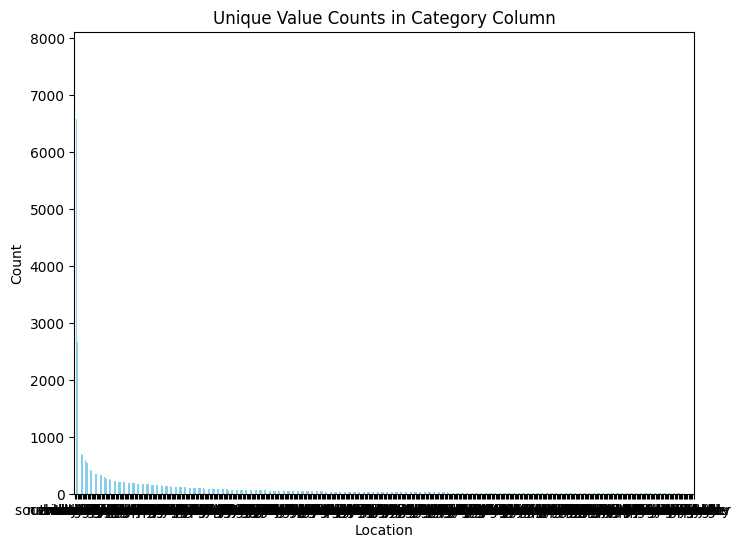

In [12]:
value_counts = df['Location'].value_counts()

# Plotting the counts
plt.figure(figsize=(8, 6))
value_counts.plot(kind='bar', color='skyblue')
plt.title('Unique Value Counts in Category Column')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

faulty(with typos) location we got are <br>
1059      hampshira<br>
3991      cembridge<br>
5885          londn<br>
12015     warringtn<br>
12313       oxfords<br>
16351     hampshira<br>
19633    manchaster<br>
25895       croydan<br>
27349         leads<br>
37406         londn<br>
38179     cembridge<br>
38986    manchaster<br>
45941       croydan<br>
47204      livepool<br>
49093         leads<br>

In [13]:
for x in faultyLocationEntries:
    # Get all unique locations except the current one
    possible_matches = set(df['Location']) - {df['Location'][x]}
    # Find the closest match
    close_matches = difflib.get_close_matches(df['Location'][x], possible_matches, n=1, cutoff=0.80)
    if close_matches:  # If a close match is found
        df.loc[x, 'Location'] = close_matches[0]  # Update the DataFrame with the close match

Now, since we corrected values, if we check again, there should be no entry which is occuring less than 5 times so we can say that typos are eliminated. 

In [14]:
locations_counts = df['Location'].value_counts()
locations_to_show = locations_counts[locations_counts < 5].index
filtered_entries = df[df['Location'].isin(locations_to_show)]
filtered_entries

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName


<h2>Company Cloumn</h2>

In [15]:
faultyCompanyEntries = df[df['Company'].isna()].index.tolist()
faultyCompanyEntries
df[df['Company'].isna() == True]

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
18847,71614781,Deputy Manager Matlock,matlock,None,full_time,None,Healthcare & Nursing Jobs,32000,20130822T120000,20131120T120000,staffnurse.com
19064,71094364,Home Manager Matlock,matlock,None,full_time,None,Healthcare & Nursing Jobs,25500,20121016T150000,20121215T150000,staffnurse.com
19116,70645304,General Manager Manchester,manchester,None,full_time,None,Healthcare & Nursing Jobs,36500,20120227T150000,20120328T150000,staffnurse.com
19204,70474471,Services Manager Aylesbury,aylesbury,None,full_time,None,Healthcare & Nursing Jobs,32500,20131003T000000,20131202T000000,staffnurse.com
19384,70265515,REGISTERED GENERAL NURSE REQUIRED Maidstone,maidstone,None,full_time,None,Healthcare & Nursing Jobs,0,20120720T150000,20120918T150000,staffnurse.com
...,...,...,...,...,...,...,...,...,...,...,...
50741,70229148,PHP Developer Bristol,bristol,None,None,contract,IT Jobs,31200,20121217T120000,20121231T120000,3desk.com
50742,68290740,Magento Webmaster (Fashion Ecommerce),manchester,None,None,contract,IT Jobs,23040,20131222T000000,20140121T000000,3desk.com
50743,69973924,SEO Engineer,nuneaton,None,None,contract,IT Jobs,24000,20130428T120000,20130528T120000,3desk.com
50744,71600610,eBooks& Apps Developer Apprenticeship,rochdale,None,None,contract,IT Jobs,71040,20130308T120000,20130507T120000,3desk.com


In [16]:
# Replace NaN values with "Non-specified"
df['Company'].fillna('Non-specified', inplace=True)

<h2>ContractType Column</h2>

In [17]:
df['ContractType'].value_counts()


ContractType
full_time    11249
              7187
N/A           5658
-             4924
part_time     1421
Name: count, dtype: int64

In [18]:
for i in df['ContractType'].index:
    if df['ContractType'][i] == 'full_time' or df['ContractType'][i] == 'part_time':
        continue
    else:
        df['ContractType'][i] = 'non-specified'
df['ContractType'].value_counts()

ContractType
non-specified    38083
full_time        11249
part_time         1421
Name: count, dtype: int64

<h2>ContractTime Column</h2>

In [19]:
valid_contract_times = {'permanent', 'contract'}
df['ContractTime'] = df['ContractTime'].apply(lambda x: x if x in valid_contract_times else 'non-specified')

# Get the indices of rows where the 'ContractTime' column is 'non-specified'
faultyContractTime = df[df['ContractTime'] == 'non-specified'].index.tolist()
df['ContractTime'].value_counts()

ContractTime
permanent        31024
non-specified    14101
contract          5628
Name: count, dtype: int64

<h2>Category Column</h2>

In [20]:
valid_categories = {
    'IT Jobs', 'Healthcare & Nursing Jobs', 'Engineering Jobs', 'Accounting & Finance Jobs', 
    'Sales Jobs', 'Hospitality & Catering Jobs', 'Teaching Jobs', 'PR, Advertising & Marketing Jobs'
}

df['Category'] = df['Category'].apply(lambda x: x if x in valid_categories else None)

# Get the indices of rows where the 'Category' column is None
faultyCategory = df[df['Category'].isnull()].index.tolist()
df['Category'].value_counts()


Category
IT Jobs                             13118
Healthcare & Nursing Jobs            8070
Engineering Jobs                     7523
Accounting & Finance Jobs            6780
Sales Jobs                           4879
Hospitality & Catering Jobs          4400
Teaching Jobs                        3470
PR, Advertising & Marketing Jobs     2513
Name: count, dtype: int64

<h2>OpenDate Column

In [21]:
df['OpenDate'] = pd.to_datetime(df['OpenDate'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')
df['CloseDate'] = pd.to_datetime(df['CloseDate'], errors='coerce').dt.strftime('%Y-%m-%d %H:%M:%S')

<h2>CloseDate Column

In [31]:
invalid_open_dates = df[df['OpenDate'] == 'NaT']
invalid_close_dates = df[df['CloseDate'] == 'NaT']

invalid_open_count = len(invalid_open_dates)
invalid_close_count = len(invalid_close_dates)

0

<h2>Location Column</h2>

In [23]:
df['Location'].unique()

array(['london', 'hertfordshire', 'birmingham', 'the city', 'shropshire',
       'bracknell', 'manchester', 'lancashire', 'gloucestershire',
       'east riding', 'uk', 'reigate', 'south east england',
       'east london', 'newcastle upon tyne', 'eastleigh', 'bedfordshire',
       'bury', 'wigan', 'essex', 'staffordshire', 'kent', 'leeds',
       'brighton', 'leicestershire', 'camberley', 'west midlands',
       'croydon', 'surrey', 'northamptonshire', 'hampshire',
       'milton keynes', 'cardiff', 'north yorkshire', 'buckinghamshire',
       'edinburgh', 'glasgow', 'west sussex', 'chelmsford', 'bristol',
       'suffolk', 'preston', 'welwyn garden city', 'west yorkshire',
       'city', 'chesterfield', 'worcester', 'merseyside',
       'stoke-on-trent', 'ipswich', 'warwickshire', 'sevenoaks',
       'southampton', 'central london', 'rugby', 'sheffield',
       'yorkshire and humberside', 'west town', 'horsforth',
       'craigiehall', 'manchester science park', 'calcot', 'somerset',

<h2>Salary Column</h2>

<h4>Since we have all the columns' data type as 'object', we will convert to appropriate data type individually</h4>

<h4>Below is the conversion of 'Salary' column. We carried out regex matching to normalise data like 47500/year, 25000 -  30000 or 21500 to 26500.</h4>
<b>Note: We haven't dealt with null values yet</b>

In [24]:
faultySalaryIndices = []
for index, value in df['Salary'].items():
    if value is not None:
        try:
            df.at[index, 'Salary'] = float(value)
        except ValueError:
            faultySalaryIndices.append(index)
    else:
        faultySalaryIndices.append(index)
# df[df['Salary'].dtype]
(faultySalaryIndices)
for i in faultySalaryIndices:
    print(i, ':', df['Salary'][i])
print('len: ', len(faultySalaryIndices))

104 : 21500 to 26500
168 : 25000 -  30000
175 :  
196 : 47500/year
223 :  
226 : 32500 to 37500
238 :  
239 :  
249 :  
266 : 40000 to 45000
278 :  
307 : 30000/year
320 :  
322 :  
349 : 35000 to 40000
365 :  
380 :  
420 :  
437 :  
470 :  
491 :  
534 :  
539 :  
575 :  
582 :  
605 : 40000 -  45000
606 :  
618 :  
639 :  
651 :  
663 :  
676 :  
679 :  
684 :  
704 : 42500/year
754 : 30k
759 :  
764 :  
838 :  
842 :  
866 :  
871 :  
878 :  
881 :  
887 :  
894 :  
897 : 45000 perAnnum
908 :  
926 :  
929 :  
936 :  
962 :  
982 : 45000 to 50000
986 :  
987 : 46k
991 :  
1018 :  
1064 : 52500 perAnnum
1067 :  
1099 :  
1103 :  
1104 :  
1105 : 36k
1126 :  
1131 :  
1146 :  
1162 :  
1216 :  
1217 :  
1218 : 29750 to 34750
1248 : 40000/year
1267 :  
1269 :  
1285 :  
1357 :  
1370 :  
1378 :  
1383 :  
1391 :  
1392 :  
1393 :  
1442 :  
1452 :  
1454 : 42500 to 47500
1487 :  
1503 :  
1528 :  
1535 :  
1542 :  
1547 :  
1549 : 40k
1580 :  
1592 :  
1595 :  
1618 : 27500 to 32500
1

<h4>Below is the conversion of 'Salary' column. We carried out regex matching to normalise data like 47500/year, 25000 -  30000 or 21500 to 26500.</h4>
<b>Note: We haven't dealt with null values yet</b>

In [25]:
outOfFormatIndicesSalary = []

def normalised(sal_string, index):
    # case 1, extract num in annual salary strings with format num-num
    result = re.fullmatch(r'(\d+\.?\d*)\s*(-|to|~)\s*(\d+\.?\d*)', sal_string)
    if result:
        outOfFormatIndicesSalary.append(index)
        return (float(result.group(1)) + float(result.group(3))) / 2
    
    # case 2, extract num in annual salary strings with other format
    result = re.fullmatch(r'(\d+\.?\d*)(?: per [aA]num| pa|[/\\][yY]ear| perAnnum)', sal_string)
    if result:
        outOfFormatIndicesSalary.append(index)
        return float(result.group(1))
    
    # case 3, extract k-formatted numbers
    result = re.fullmatch(r'(\d+)k', sal_string)
    if result:
        outOfFormatIndicesSalary.append(index)
        return (float(result.group(1))) * 1000
    
    # case 4, extract hourly wage and convert to annual salary
    result = re.fullmatch(r'(\d+\.\d*)\s*(per hour|p/h)', sal_string)
    if result:
        outOfFormatIndicesSalary.append(index)
        return (float(result.group(1))) * 8 * 5 * 52

In [26]:

# Applying the modified function to the DataFrame
for idx, value in enumerate(df['Salary']):
    if isinstance(value, str):
        df.at[idx, 'Salary'] = normalised(value, idx)
len(outOfFormatIndicesSalary)

460

<h4>The following are the null values stored in a list in Salary column. </h4>

In [27]:
nullValuesSalaryIndices = [index for index, value in enumerate(df['Salary']) if value is None]

len(nullValuesSalaryIndices)

1632

In [28]:
for i in nullValuesSalaryIndices:
    df['Salary'][i] = 0
df.head(5)

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,68241654,PI Underwriter Regional Markets,london,Idex Consulting LLP,non-specified,permanent,Accounting & Finance Jobs,57500.0,2012-12-14 00:00:00,2013-02-12 00:00:00,insurancejobs.co.uk
1,71138818,COMMERCIAL INSURANCE ACCOUNT HANDLER HERTFORD...,london,Clark James Insurance And Financial Services R...,non-specified,permanent,Accounting & Finance Jobs,26000.0,2013-03-14 15:00:00,2013-06-12 15:00:00,insurancejobs.co.uk
2,71391843,Claims Handler Motor Trade,hertfordshire,Lawes Insurance Recruitment,non-specified,permanent,Accounting & Finance Jobs,19000.0,2013-11-24 12:00:00,2014-02-22 12:00:00,insurancejobs.co.uk
3,70420154,Commercial Jewellers Block Account Handler,birmingham,Lawes Insurance Recruitment,non-specified,permanent,Accounting & Finance Jobs,22000.0,2012-12-30 15:00:00,2013-01-29 15:00:00,insurancejobs.co.uk
4,67779524,Protection Indemnity Underwriter,the city,Lawes Insurance Recruitment,non-specified,permanent,Accounting & Finance Jobs,45000.0,2012-09-04 15:00:00,2012-11-03 15:00:00,insurancejobs.co.uk


In [29]:
# # bulid a linear regression model 
# cols = ['Location','Company', 'ContractTime','Category']
# x_train = df[cols]
# y_train = df['Salary']
# regr = linear_model.LinearRegression()
# regr.fit(x_train,y_train) # build the model

## We will Audit the data one-by-one thus, each column will have one or more cell for inspection and clensing

<h2> 

......

## Saving data
Save the parsed and cleaned data as well as the error list, named as:
- \<student\_id\>_dataset1_solution.csv
- \<student\_id\>_errorlist.csv

In [30]:
# code to save output data


## Summary
Give a short summary and anything you would like to talk about the assessment here.